Part 1


11490434/11490434 [==============================] - 2s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 6s 8ms/step - loss: 0.6953 - val_loss: 0.6952
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6950 - val_loss: 0.6950
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 10/

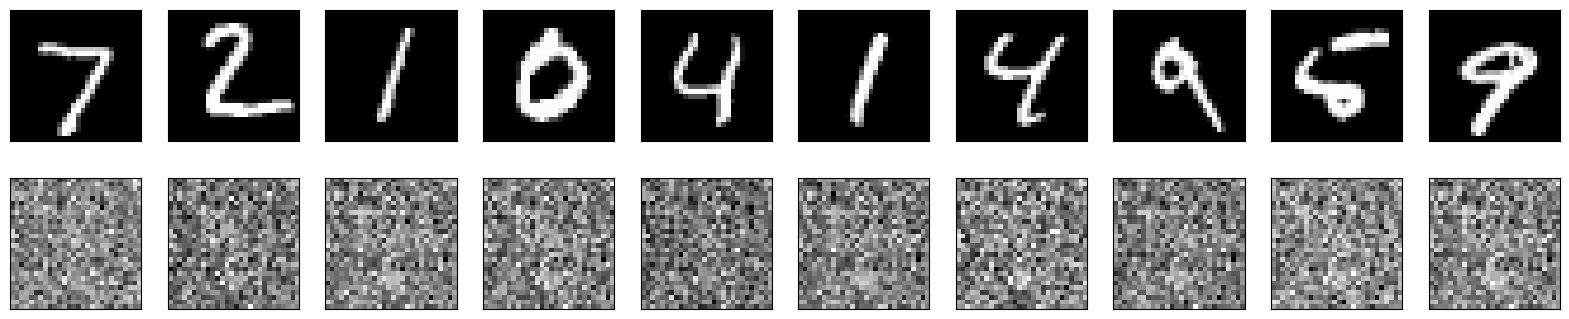

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Sorting the differences and finding top 10 images with most autoencoder errors.

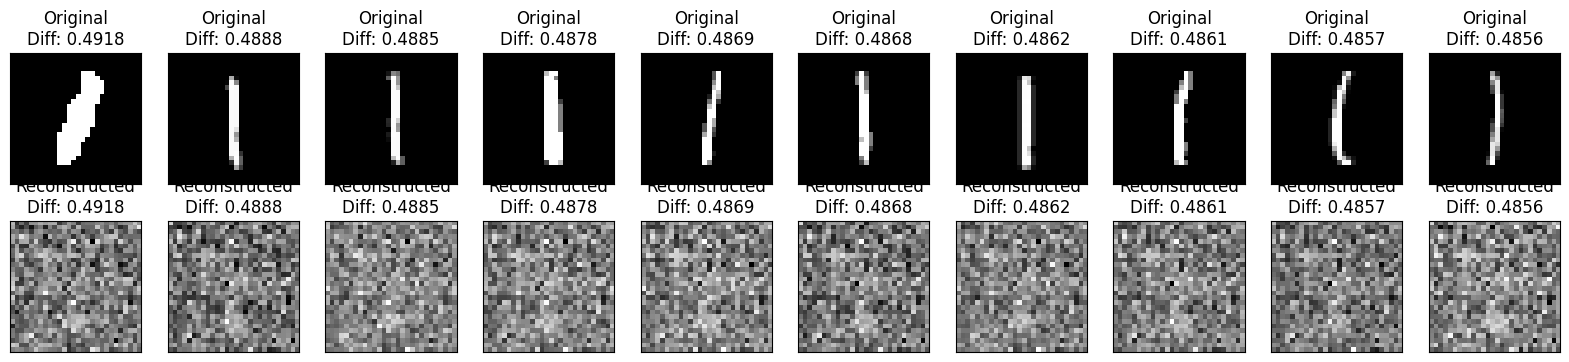

In [7]:

import numpy as np

diff_imgs=np.abs(x_test-decoded_imgs)

mean_diff=np.mean(diff_imgs,axis=1)

top_10=np.argsort(mean_diff)[-10:][::-1]

import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for i,index in enumerate(top_10): #Original Image
  ax=plt.subplot(2,10,i+1)
  plt.imshow(x_test[index].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title(f'Original\nDiff: {mean_diff[index]:.4f}')

#Decoded Image
  ax=plt.subplot(2,10,i+11)
  plt.imshow(decoded_imgs[index].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title(f'\nReconstructed\nDiff: {mean_diff[index]:.4f}')
plt.show()
# As per the visualisation the images are not that really different from most of the rest.

Part 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
data=pd.read_csv('/content/data1.csv')
missing=data.isnull().sum()
print(missing)
data_dropped=data.dropna()
X=data_dropped.iloc[:,:28]
y=data_dropped.iloc[:,28]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      1
V27      1
V28      1
Class    1
dtype: int64


In [6]:
#Defining the architecture for Vanilla auto-encoder with 1 layer for encoder and decoder each (hidden layer nodes=2)
def vanilla_autoencoder(input_dim):
  model1=Sequential()
  model1.add(Dense(2,activation='relu',input_shape=(input_dim,)))
  model1.add(Dense(input_dim,activation='sigmoid'))
  model1.compile(loss='mse',optimizer='adam')
  return model1

In [7]:
model1=vanilla_autoencoder(X_scaled.shape[1])
model1.fit(X_scaled,X_scaled,epochs=10,batch_size=32)

Epoch 1/10
1033/1033 [==============================] - 3s 2ms/step - loss: 1.0913
Epoch 2/10
1033/1033 [==============================] - 2s 2ms/step - loss: 0.9671
Epoch 3/10
1033/1033 [==============================] - 2s 2ms/step - loss: 0.9539
Epoch 4/10
1033/1033 [==============================] - 2s 2ms/step - loss: 0.9481
Epoch 5/10
1033/1033 [==============================] - 2s 2ms/step - loss: 0.9419
Epoch 6/10
1033/1033 [==============================] - 2s 2ms/step - loss: 0.9359
Epoch 7/10
1033/1033 [==============================] - 2s 2ms/step - loss: 0.9307
Epoch 8/10
1033/1033 [==============================] - 2s 2ms/step - loss: 0.9260
Epoch 9/10
1033/1033 [==============================] - 2s 2ms/step - loss: 0.9223
Epoch 10/10
1033/1033 [==============================] - 2s 2ms/step - loss: 0.9200


In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 58        
                                                                 
 dense_1 (Dense)             (None, 28)                84        
                                                                 
Total params: 142 (568.00 Byte)
Trainable params: 142 (568.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1033/1033 [==============================] - 4s 4ms/step


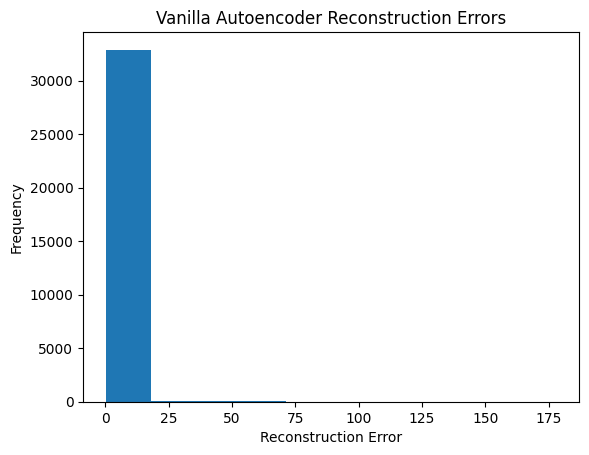

In [9]:
#Histogram plot of Reconstruction Errors
import numpy as np
predictions=model1.predict(X_scaled)
errors=np.mean((X_scaled-predictions)**2,axis=1)

plt.hist(errors)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Vanilla Autoencoder Reconstruction Errors')
plt.show()

In [10]:
#Deep auto-encoder with multiple layers for encoder and decoder ( final hidden layer nodes=2)
def deep_autoencoder(input_dim):
  model2=Sequential()
  model2.add(Dense(32,activation='relu',input_shape=(input_dim,)))
  model2.add(Dense(16,activation='relu'))
  model2.add(Dense(8,activation='relu'))

  model2.add(Dense(16,activation='relu'))
  model2.add(Dense(32,activation='relu'))

  model2.add(Dense(input_dim,activation='sigmoid'))
  model2.compile(loss='mse',optimizer='adam')
  return model2

In [11]:
model2=deep_autoencoder(X_scaled.shape[1])
model2.fit(X_scaled,X_scaled,epochs=10,batch_size=32)

Epoch 1/10
1033/1033 [==============================] - 3s 2ms/step - loss: 0.9316
Epoch 2/10
1033/1033 [==============================] - 2s 2ms/step - loss: 0.8448
Epoch 3/10
1033/1033 [==============================] - 2s 2ms/step - loss: 0.8288
Epoch 4/10
1033/1033 [==============================] - 3s 3ms/step - loss: 0.8220
Epoch 5/10
1033/1033 [==============================] - 3s 3ms/step - loss: 0.8155
Epoch 6/10
1033/1033 [==============================] - 2s 2ms/step - loss: 0.8094
Epoch 7/10
1033/1033 [==============================] - 2s 2ms/step - loss: 0.8041
Epoch 8/10
1033/1033 [==============================] - 2s 2ms/step - loss: 0.8014
Epoch 9/10
1033/1033 [==============================] - 3s 2ms/step - loss: 0.7984
Epoch 10/10
1033/1033 [==============================] - 3s 3ms/step - loss: 0.7925


In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                928       
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 28)                924       
                                                                 
Total params: 3204 (12.52 KB)
Trainable params: 3204 (

1033/1033 [==============================] - 2s 1ms/step


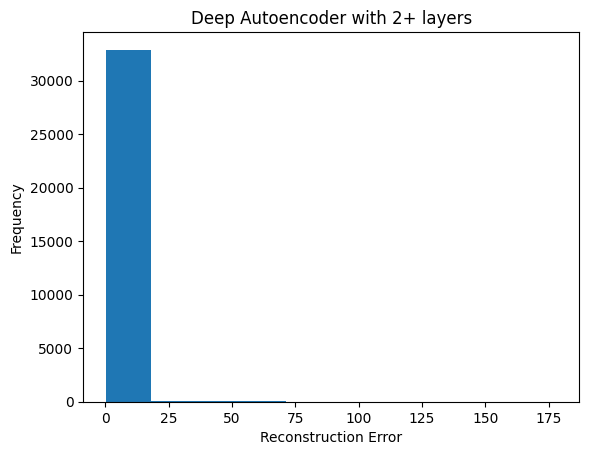

In [13]:
#Histogram Plot of Reconstruction Errors
prediction2=model2.predict(X_scaled)
errors=np.mean((X_scaled-predictions)**2,axis=1)

plt.hist(errors)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Deep Autoencoder with 2+ layers')
plt.show()

Plotting of scatter plots of hidden layer vector samples

In [15]:
def get_encoded_data(model,X_scaled):
  encode=model.predict(X_scaled)
  return encode
#Decoding the encoded data
def get_decoded_data(model,encoded_data):
  decoded=model.predict(encoded_data)
  return decoded

In [16]:
vanilla=get_encoded_data(model1,X_scaled)
deep=get_encoded_data(model2,X_scaled)

1033/1033 [==============================] - 5s 5ms/step


In [17]:
vanilla_decoded=get_decoded_data(model1,X_scaled)
deep_decoded=get_decoded_data(model2,X_scaled)

1033/1033 [==============================] - 1s 1ms/step


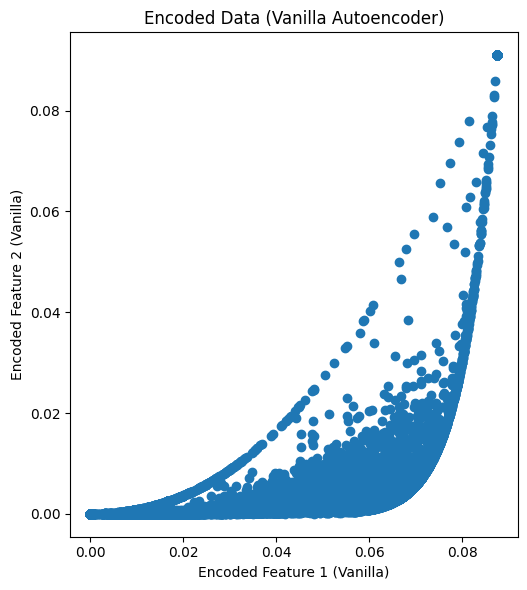

In [18]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.scatter(vanilla[:,0],vanilla[:,1])
plt.xlabel('Encoded Feature 1 (Vanilla)')
plt.ylabel('Encoded Feature 2 (Vanilla)')
plt.title('Encoded Data (Vanilla Autoencoder)')
plt.tight_layout()
plt.show()

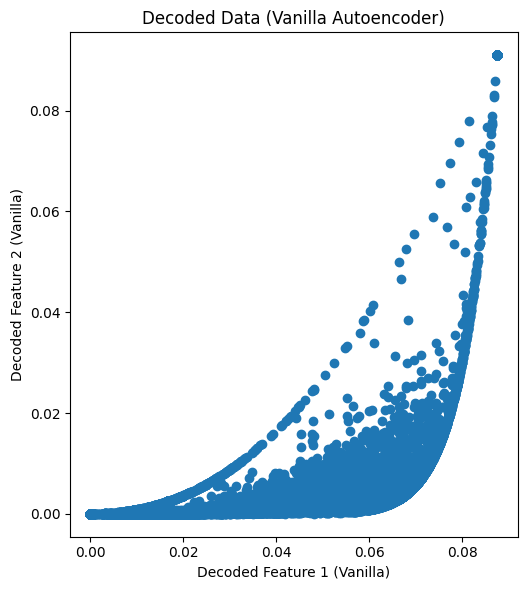

In [19]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.scatter(vanilla_decoded[:,0],vanilla_decoded[:,1])
plt.xlabel('Decoded Feature 1 (Vanilla)')
plt.ylabel('Decoded Feature 2 (Vanilla)')
plt.title('Decoded Data (Vanilla Autoencoder)')
plt.tight_layout()
plt.show()

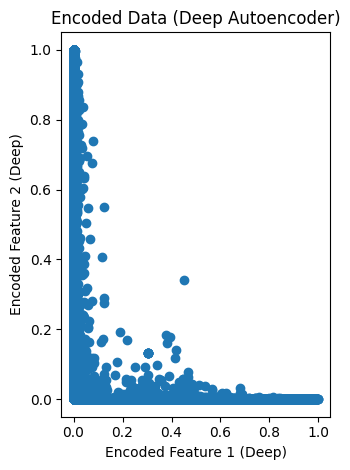

In [20]:
plt.subplot(122)
plt.scatter(deep[:,0],deep[:,1])
plt.xlabel('Encoded Feature 1 (Deep)')
plt.ylabel('Encoded Feature 2 (Deep)')
plt.title('Encoded Data (Deep Autoencoder)')
plt.tight_layout()
plt.show()


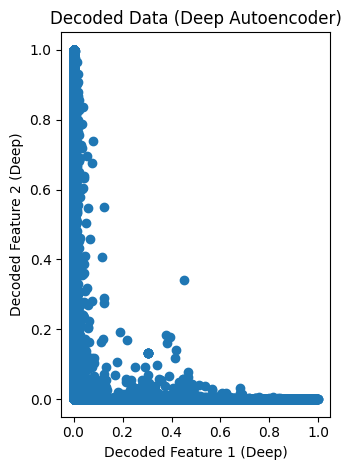

In [21]:
plt.subplot(122)
plt.scatter(deep_decoded[:,0],deep_decoded[:,1])
plt.xlabel('Decoded Feature 1 (Deep)')
plt.ylabel('Decoded Feature 2 (Deep)')
plt.title('Decoded Data (Deep Autoencoder)')
plt.tight_layout()
plt.show()

Column 29 to put colors of the scatter plots.

*   0 denotes green color
*   1 denotes red color



In [22]:
from matplotlib.colors import ListedColormap
class_c=['green','red']
cmap=ListedColormap(class_c)

Text(0.5, 1.0, 'Encoded Data (Vanilla Autoencoder)')

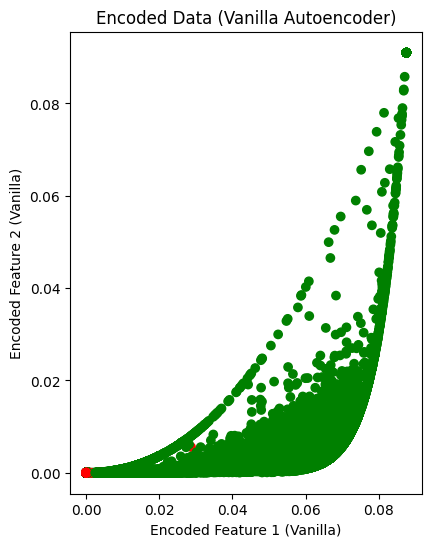

In [23]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.scatter(vanilla[:, 0],vanilla[:, 1], c=y.values, cmap=cmap)  # Using y.values for colors, 0->green, 1->red
plt.xlabel("Encoded Feature 1 (Vanilla)")
plt.ylabel("Encoded Feature 2 (Vanilla)")
plt.title("Encoded Data (Vanilla Autoencoder)")


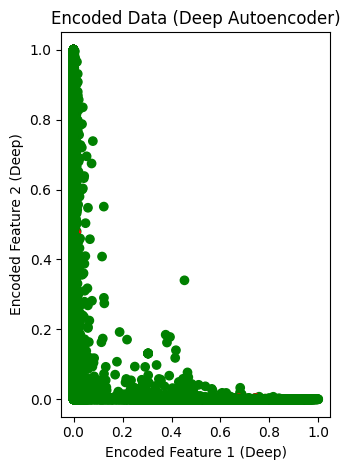

In [24]:
plt.subplot(122)
plt.scatter(deep[:,0],deep[:,1],c=y.values,cmap=cmap)
plt.xlabel('Encoded Feature 1 (Deep)')
plt.ylabel('Encoded Feature 2 (Deep)')
plt.title('Encoded Data (Deep Autoencoder)')
plt.tight_layout()
plt.show()

Part 3

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 14, 14, 32)           320       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 7, 7, 64)             18496     ['conv2d[0][0]']              
                                                                                                  
 flatten (Flatten)           (None, 3136)                 0         ['conv2d_1[0][0]']            
                                                                                            

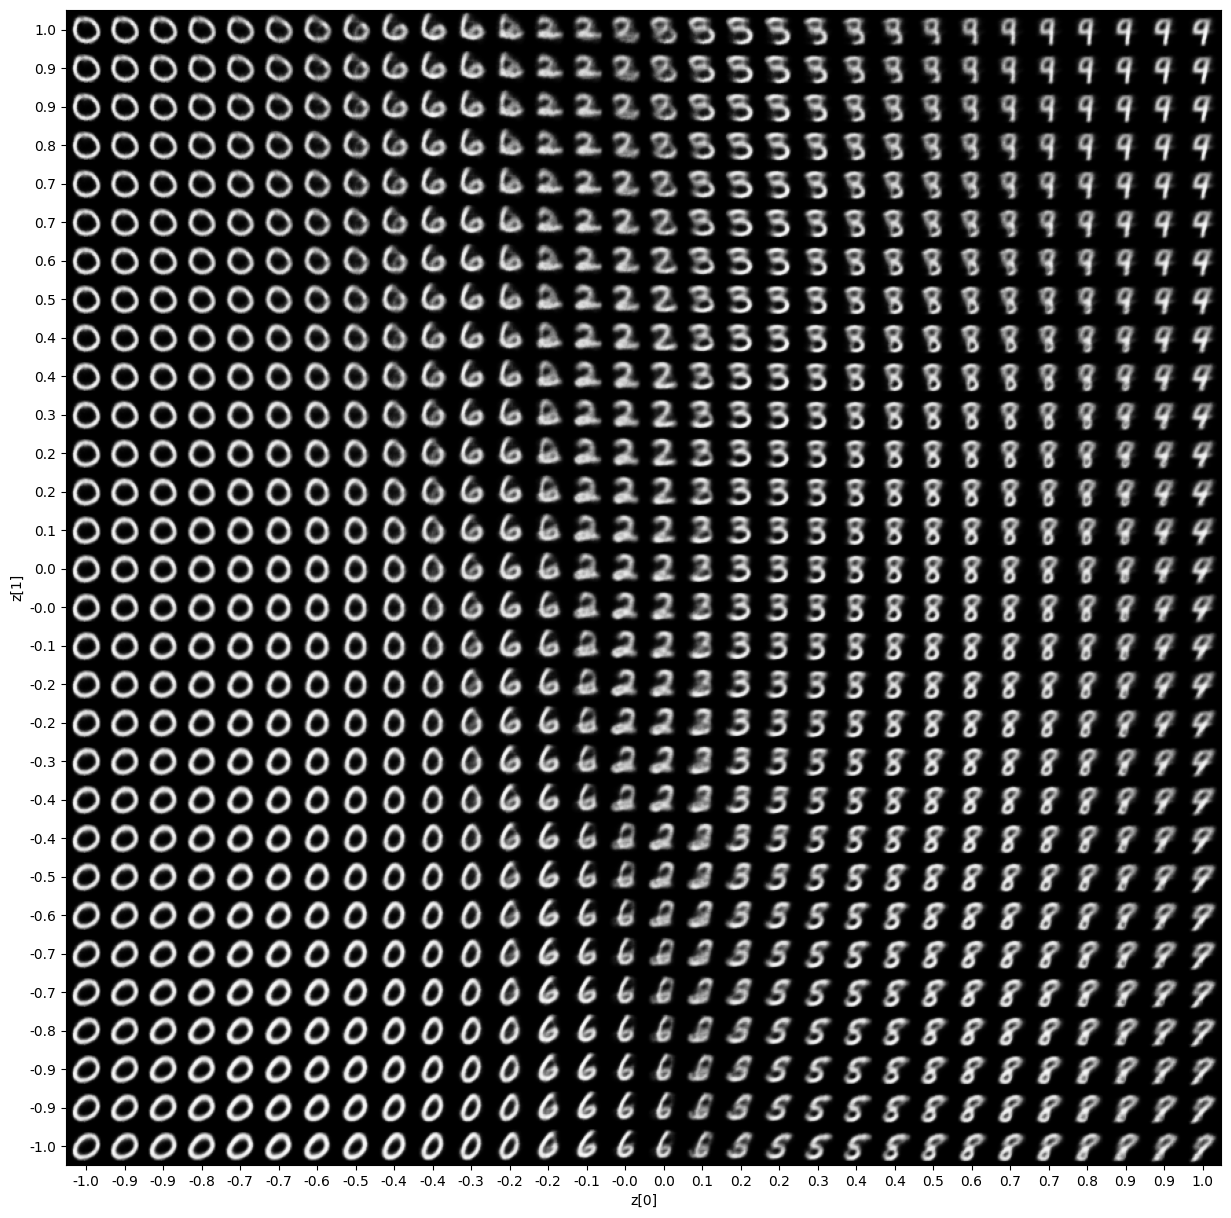

1875/1875 [==============================] - 11s 6ms/step


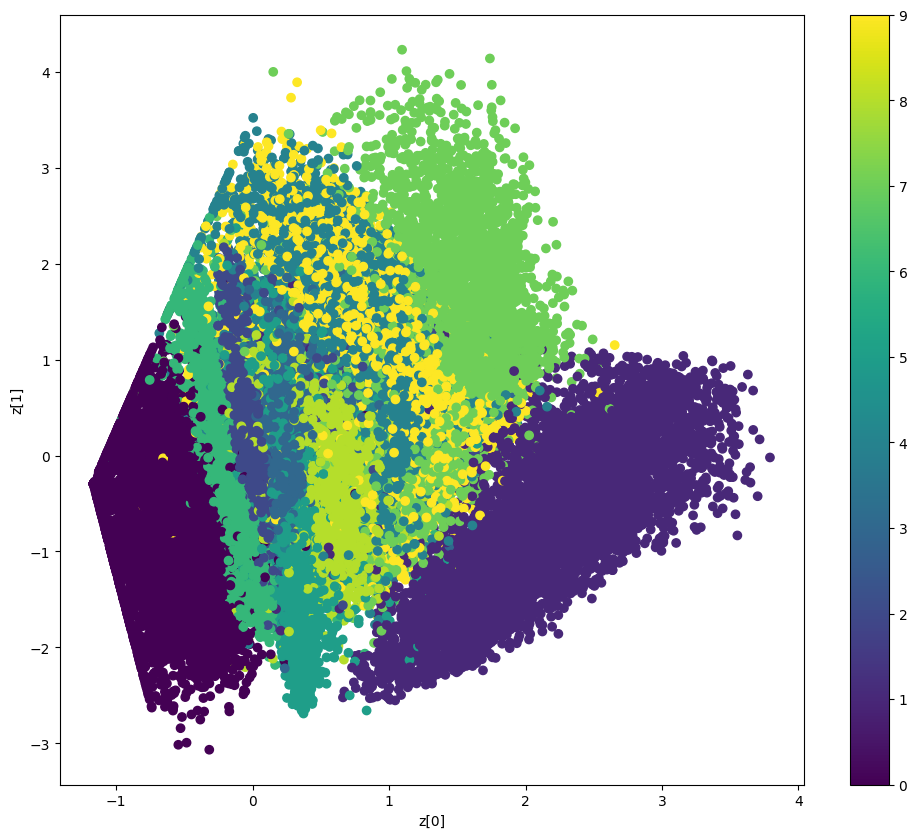

In [25]:
"""
Title: Variational AutoEncoder
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2020/05/03
Last modified: 2020/05/03
Description: Convolutional Variational AutoEncoder (VAE) trained on MNIST digits.
Accelerator: GPU
"""

"""
## Setup
"""

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

"""
## Create a sampling layer
"""


class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


"""
## Build the encoder
"""

latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

"""
## Build the decoder
"""

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

"""
## Define the VAE as a `Model` with a custom `train_step`
"""


class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


"""
## Train the VAE
"""

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

"""
## Display a grid of sampled digits
"""

import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

"""
## Display how the latent space clusters different digit classes
"""


def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

Plotting newly generated images

1/1 [==============================] - 0s 26ms/step


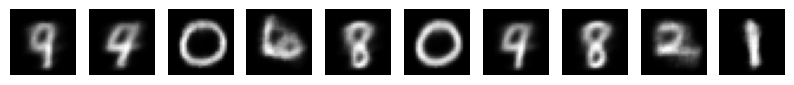

In [26]:
samples=10
random_latent_vectors=np.random.normal(size=(samples,latent_dim))
decoded=decoder.predict(random_latent_vectors)

plt.figure(figsize=(10,6))
for i in range(samples):
  ax=plt.subplot(2,samples,i+1)
  plt.imshow(decoded[i].reshape(28,28),cmap='gray')
  plt.axis('off')

plt.show()

Adding one more layer with dimension 64, Dimesnion Reuction 784->512->64->2

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 14, 14, 32)           320       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 7, 7, 64)             18496     ['conv2d[0][0]']              
                                                                                                  
 flatten (Flatten)           (None, 3136)                 0         ['conv2d_1[0][0]']            
                                                                                            

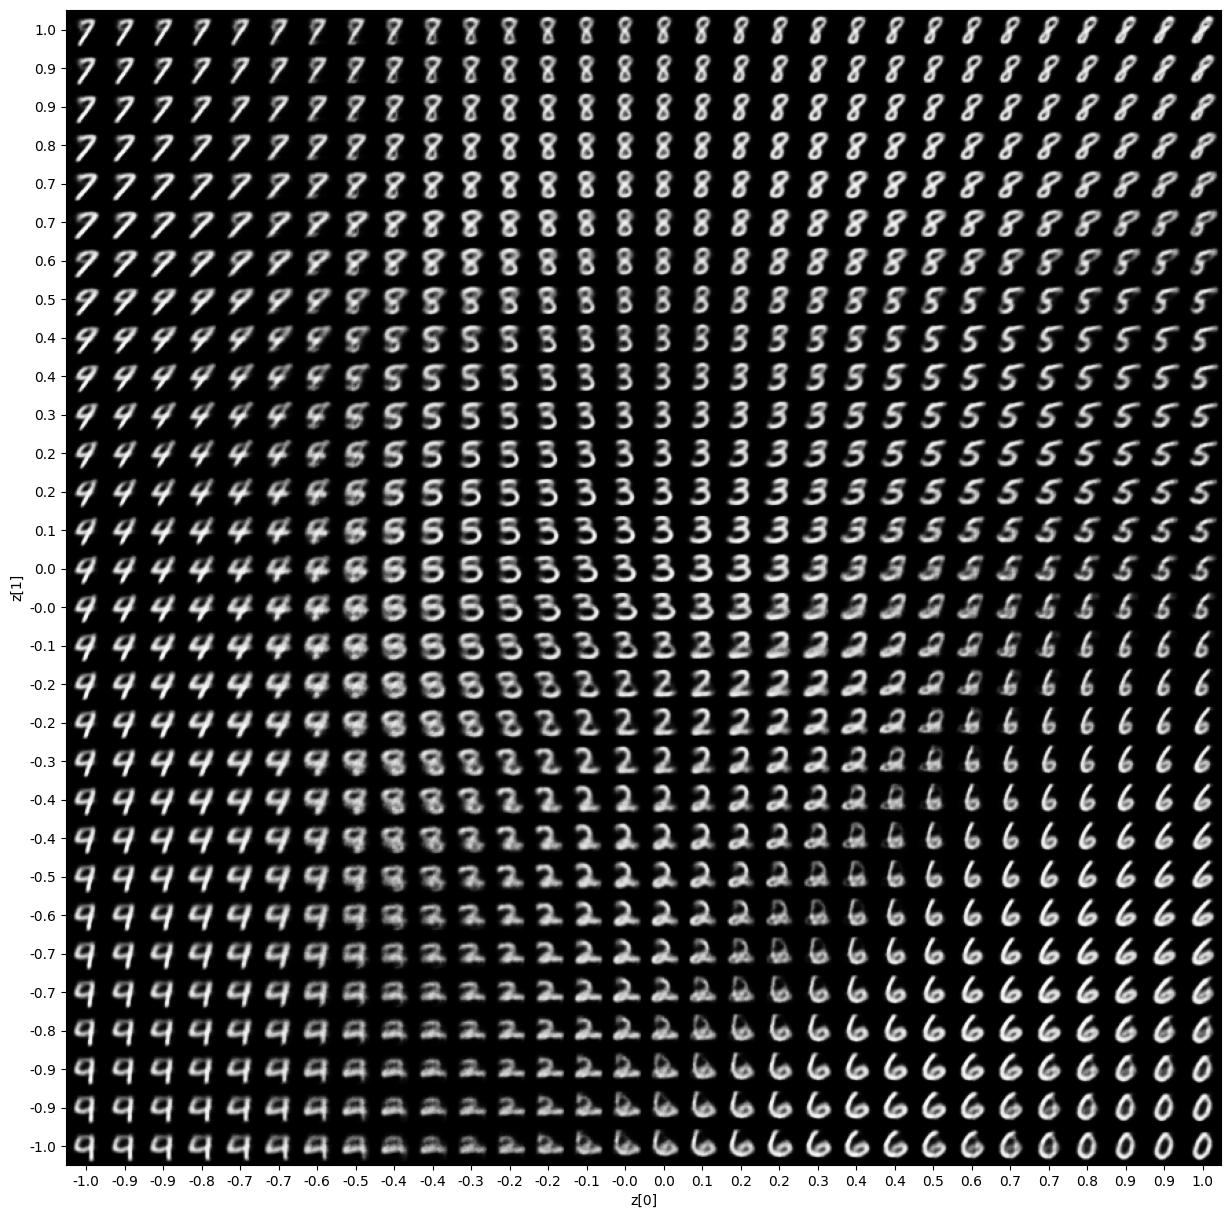

1875/1875 [==============================] - 6s 3ms/step


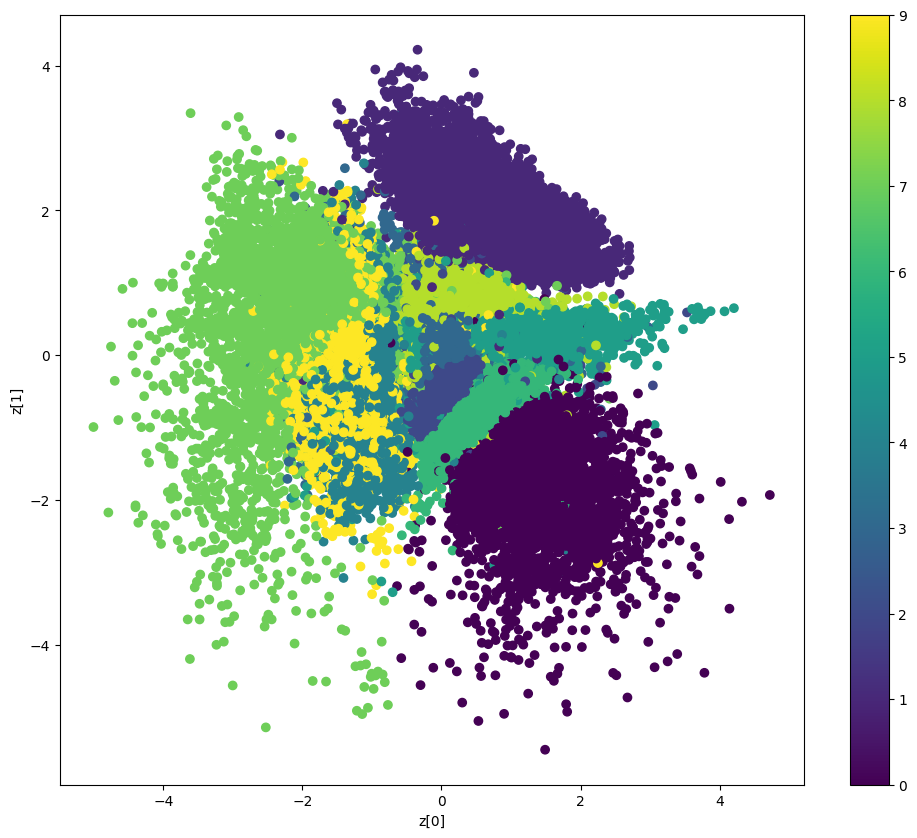

In [1]:
"""
Title: Variational AutoEncoder
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2020/05/03
Last modified: 2020/05/03
Description: Convolutional Variational AutoEncoder (VAE) trained on MNIST digits.
Accelerator: GPU
"""

"""
## Setup
"""

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

"""
## Create a sampling layer
"""


class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


"""
## Build the encoder
"""

latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation='relu')(x)
x = layers.Dense(64,activation='relu')(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

"""
## Build the decoder
"""

latent_inputs = keras.Input(shape=(latent_dim,))
x=layers.Dense(64,activation='relu')(latent_inputs)
x=layers.Dense(512,activation='relu')(x)
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

"""
## Define the VAE as a `Model` with a custom `train_step`
"""


class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


"""
## Train the VAE
"""

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

"""
## Display a grid of sampled digits
"""

import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

"""
## Display how the latent space clusters different digit classes
"""


def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

Yes, the VAE outputs are not improved but not that significantly.
